#  Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
traffic.shape

(48204, 9)

The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the dataset documentation). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

In [7]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


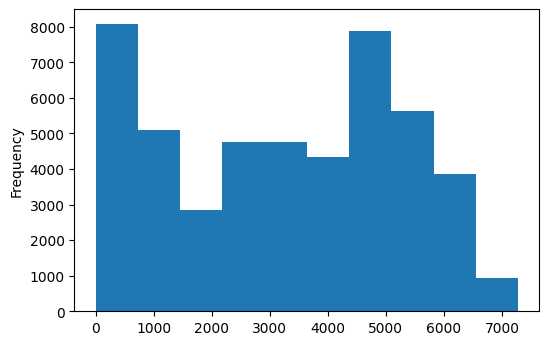

In [10]:
traffic["traffic_volume"].plot.hist()
plt.show()

In [11]:
traffic.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The histogram above shows the distribution of the `traffic_volume` column. It shows that the highest frequency of cars that pass by the station is between 0-1000 and 5000-6000. The lower amount if likely due to traffic at night. The maximum amount of cars that pass by the station is 7280 cars. The average amount of cars is 3380. Now lets compare how the traffic changes based on whether it is day or night.

In [12]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [13]:
traffic["date_time"].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

First we will divide the dataset into 2 parts.

Daytime data: hours from 7am to 7pm.

Nighttime data: hours from 7pm to 7am.

This isn't a perfect criteria but it is a good starting point.

In [14]:
daytime = traffic[(traffic["date_time"].dt.hour < 19) & 
                  (traffic["date_time"].dt.hour >= 7)]

In [15]:
nighttime = traffic[(traffic["date_time"].dt.hour >= 19) | 
                  (traffic["date_time"].dt.hour < 7)]

In [16]:
daytime.shape

(23877, 9)

In [17]:
nighttime.shape

(24327, 9)

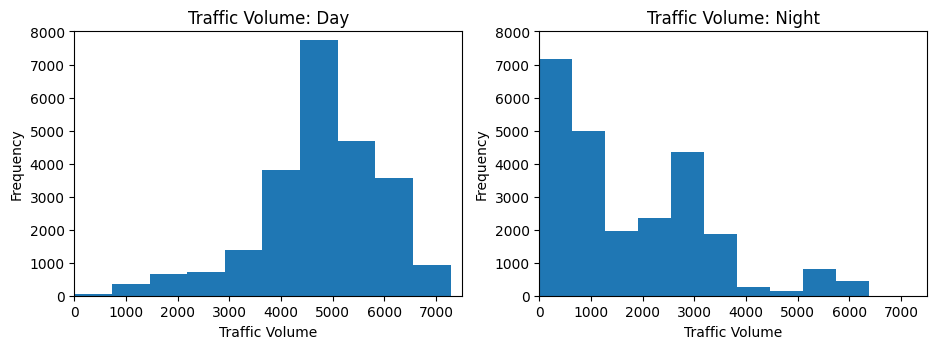

In [18]:
plt.figure(figsize=[11,3.5])
plt.subplot(1,2,1)
plt.hist(daytime.traffic_volume)
plt.title("Traffic Volume: Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(0,7500)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(nighttime.traffic_volume)
plt.title("Traffic Volume: Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.show()

The histograms above show the traffic volume during the day compared to the night.

The day histogram has a normal distribution which shows that most of traffic has between 4000-6000 cars. The mean traffic volume is 4762 cars.

The night histogram has a right skewed distribution which shows that most of the traffic during the night has been 0-1000 cars. The mean traffic volume is much lower than the day at 1785 cars.

The graphs shows that the day has significantly more traffic than the night. Our goal is to focus on heavy traffic so we'll only focus on traffic during the day from now on.

In [19]:
daytime.traffic_volume.describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [20]:
nighttime.traffic_volume.describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [21]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-21-7d784f045492>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

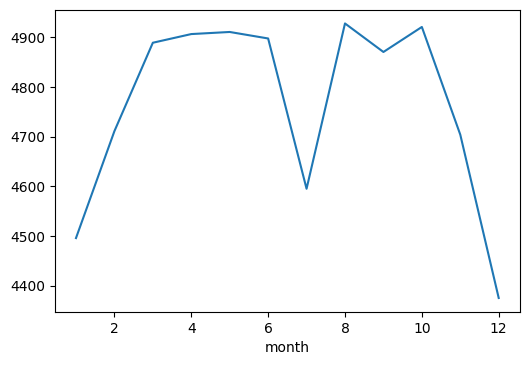

In [22]:
by_month.traffic_volume.plot.line()
plt.show()

The line graph shows that the traffic volume is lower during the winter months and higher throughout the rest of the year. There is one exception with July. Why does the traffic decline in July specifically?

In [23]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
# creates a new column that holds the day of the week
by_dayofweek = daytime.groupby('dayofweek').mean()
# Groups the data by the mean 
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-23-2a398106ae04>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

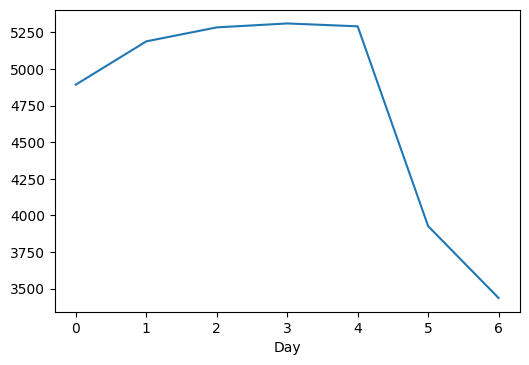

In [24]:
by_dayofweek.traffic_volume.plot.line()
plt.xlabel("Day")
plt.show()

If we group the data by the day of the week, we see that the traffic volume is consistent from Monday-Friday (0-4), then sharply declines on the weekend.

Now we will look at the average values for the time of the day. Because the weekends will drag down the average values, we will plot these separately.

In [25]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-25-f8473ede9f01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



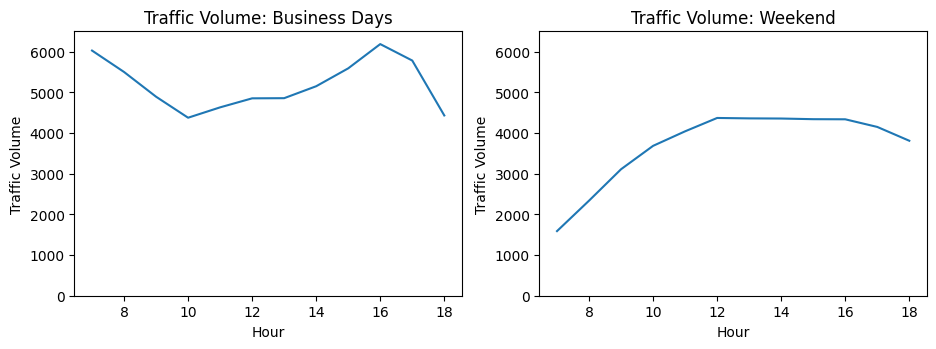

In [26]:
plt.figure(figsize=[11,3.5])

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title("Traffic Volume: Business Days")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.ylim(0,6500)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title("Traffic Volume: Weekend")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.ylim(0,6500)

plt.show()

The line charts show that traffic is generally higher on business days than wekends.

The traffic for business days is higher during 7am and 4pm. This makes sense as these are the hours where people are going to and coming back from work.

On weekends, the traffic increases until 12pm and stays consistent for the rest of the day.

## Weather Indicators

So for we've focused on the time indictors for heavy traffic and have found:
- Traffic is heavier during the warmer months
- Traffic is heavier on business days compared to weekends
- On business days the rush hours are around 7am and 4pm

In [32]:
daytime.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature is the weather pattern that has the strongest correlation with traffic volume.

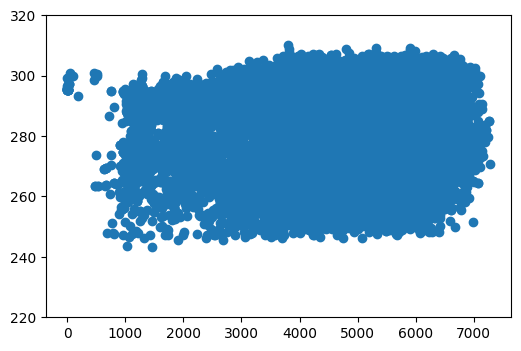

In [37]:
plt.scatter(daytime.traffic_volume, daytime.temp)
plt.ylim(220, 320)
plt.show()

From this data we can conclude that the weather is not a reliable indicator of traffic volume.

In [39]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

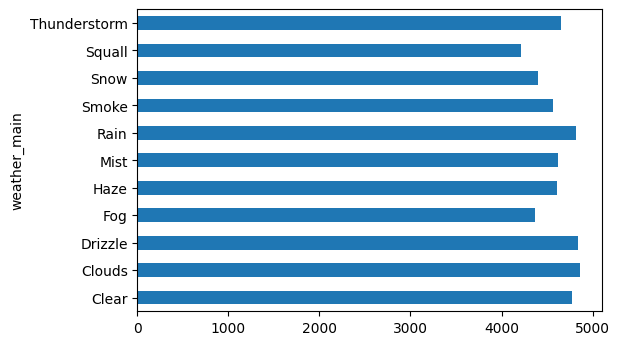

In [43]:
by_weather_main["traffic_volume"].plot.barh()
plt.show()

There is no weather type that has an average traffic volume that exceeds 5000. Let's look at `weather_description` which has more specific categories.

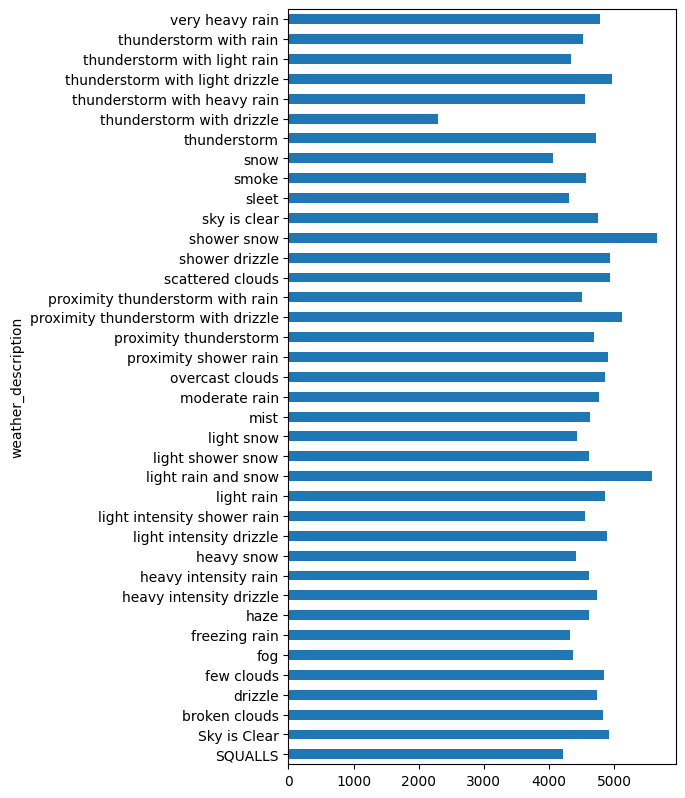

In [51]:
plt.figure(figsize=[5,10])
by_weather_description["traffic_volume"].plot.barh()

plt.show()

The bar charts show that light rain and snow, shower now, and proximity thunderstorm with drizzle exceeds 5000 cars.

## Conclusion

In this project we've made several findings:

- Traffic is heavier during the daytime
- Traffic is heavier during the warmer months
- Traffic is heavier on business days compared to weekends
- On business days the rush hours are around 7am and 4pm
- Traffic is heavier during snowy weather